# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama: Nida Annisa Sholeha
- Email: nasa6annisa@gmail.com
- Id Dicoding: Nidaannisa19

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

### Menyiapkan data yang akan digunakan

In [ ]:
df_employee = pd.read_csv('/content/employee_data.csv')

In [ ]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## **Data Understanding**

In [ ]:
df = df_employee.copy()
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
# Melihat struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
# Melihat statistik deskriptif
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Melihat statistik deskriptif tipe data 'object'
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [ ]:
# Memeriksa missing value
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
# Memeriksa nilai pada kolom attrition
print(df['Attrition'].value_counts(dropna=False))

Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


In [ ]:
# Memeriksa duplikasi data
duplicate_rows = df.duplicated().sum()

## Data Preparation/Preprocessing

In [ ]:
# Menghapus missing values
df = df.dropna(subset=['Attrition'])

In [ ]:
# Menghapus kolom yang tidak diperlukan
df.drop(columns=['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [ ]:
# Mengubah target ke integer (0 atau 1)
df['Attrition'] = df['Attrition'].astype(int)

In [ ]:
# Identifikasi Kolom Kategorikal Nominal untuk Persiapan One-Hot Encoding
nominal_cols = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# **Visualisasi Data**

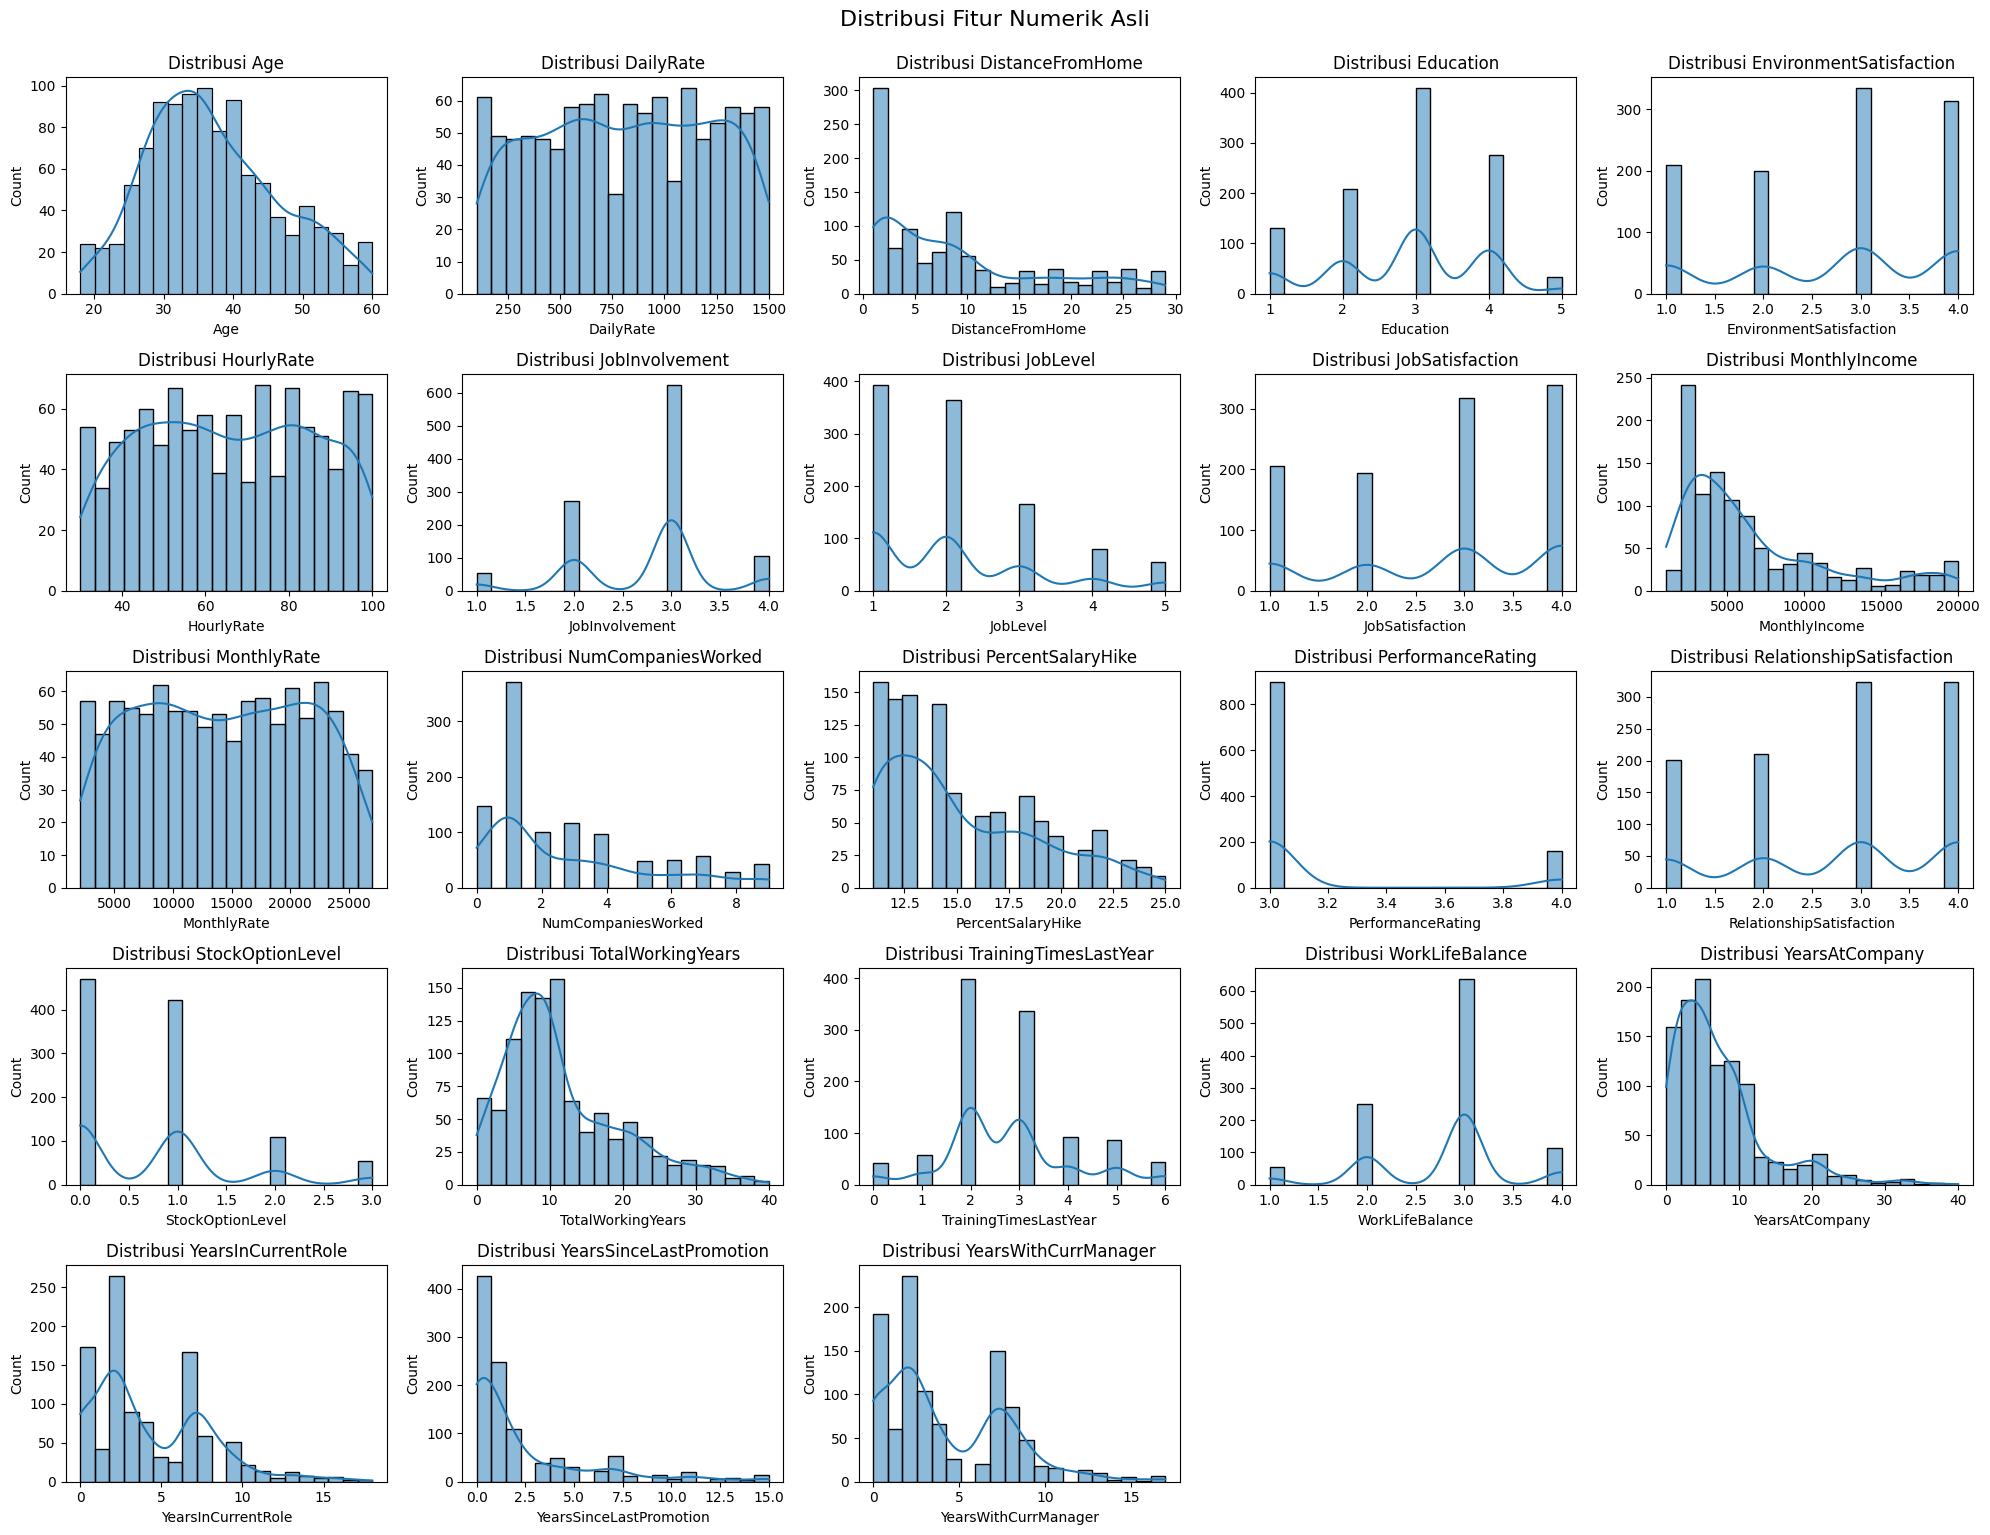

In [ ]:
# Visualisasi Distribusi Variabel Numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition' in numerical_features:
    numerical_features.remove('Attrition')

plt.figure(figsize=(20, 15))
n_cols_num = 5
n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribusi {feature}')
    plt.tight_layout()
plt.suptitle('Distribusi Fitur Numerik Asli', y=1.02, fontsize=16)
plt.savefig('distribusi_fitur_numerik.png')
plt.show()

<ipython-input-16-ec9be7407390>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
<ipython-input-16-ec9be7407390>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
<ipython-input-16-ec9be7407390>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
<ipython-input-16-ec9be7407390>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

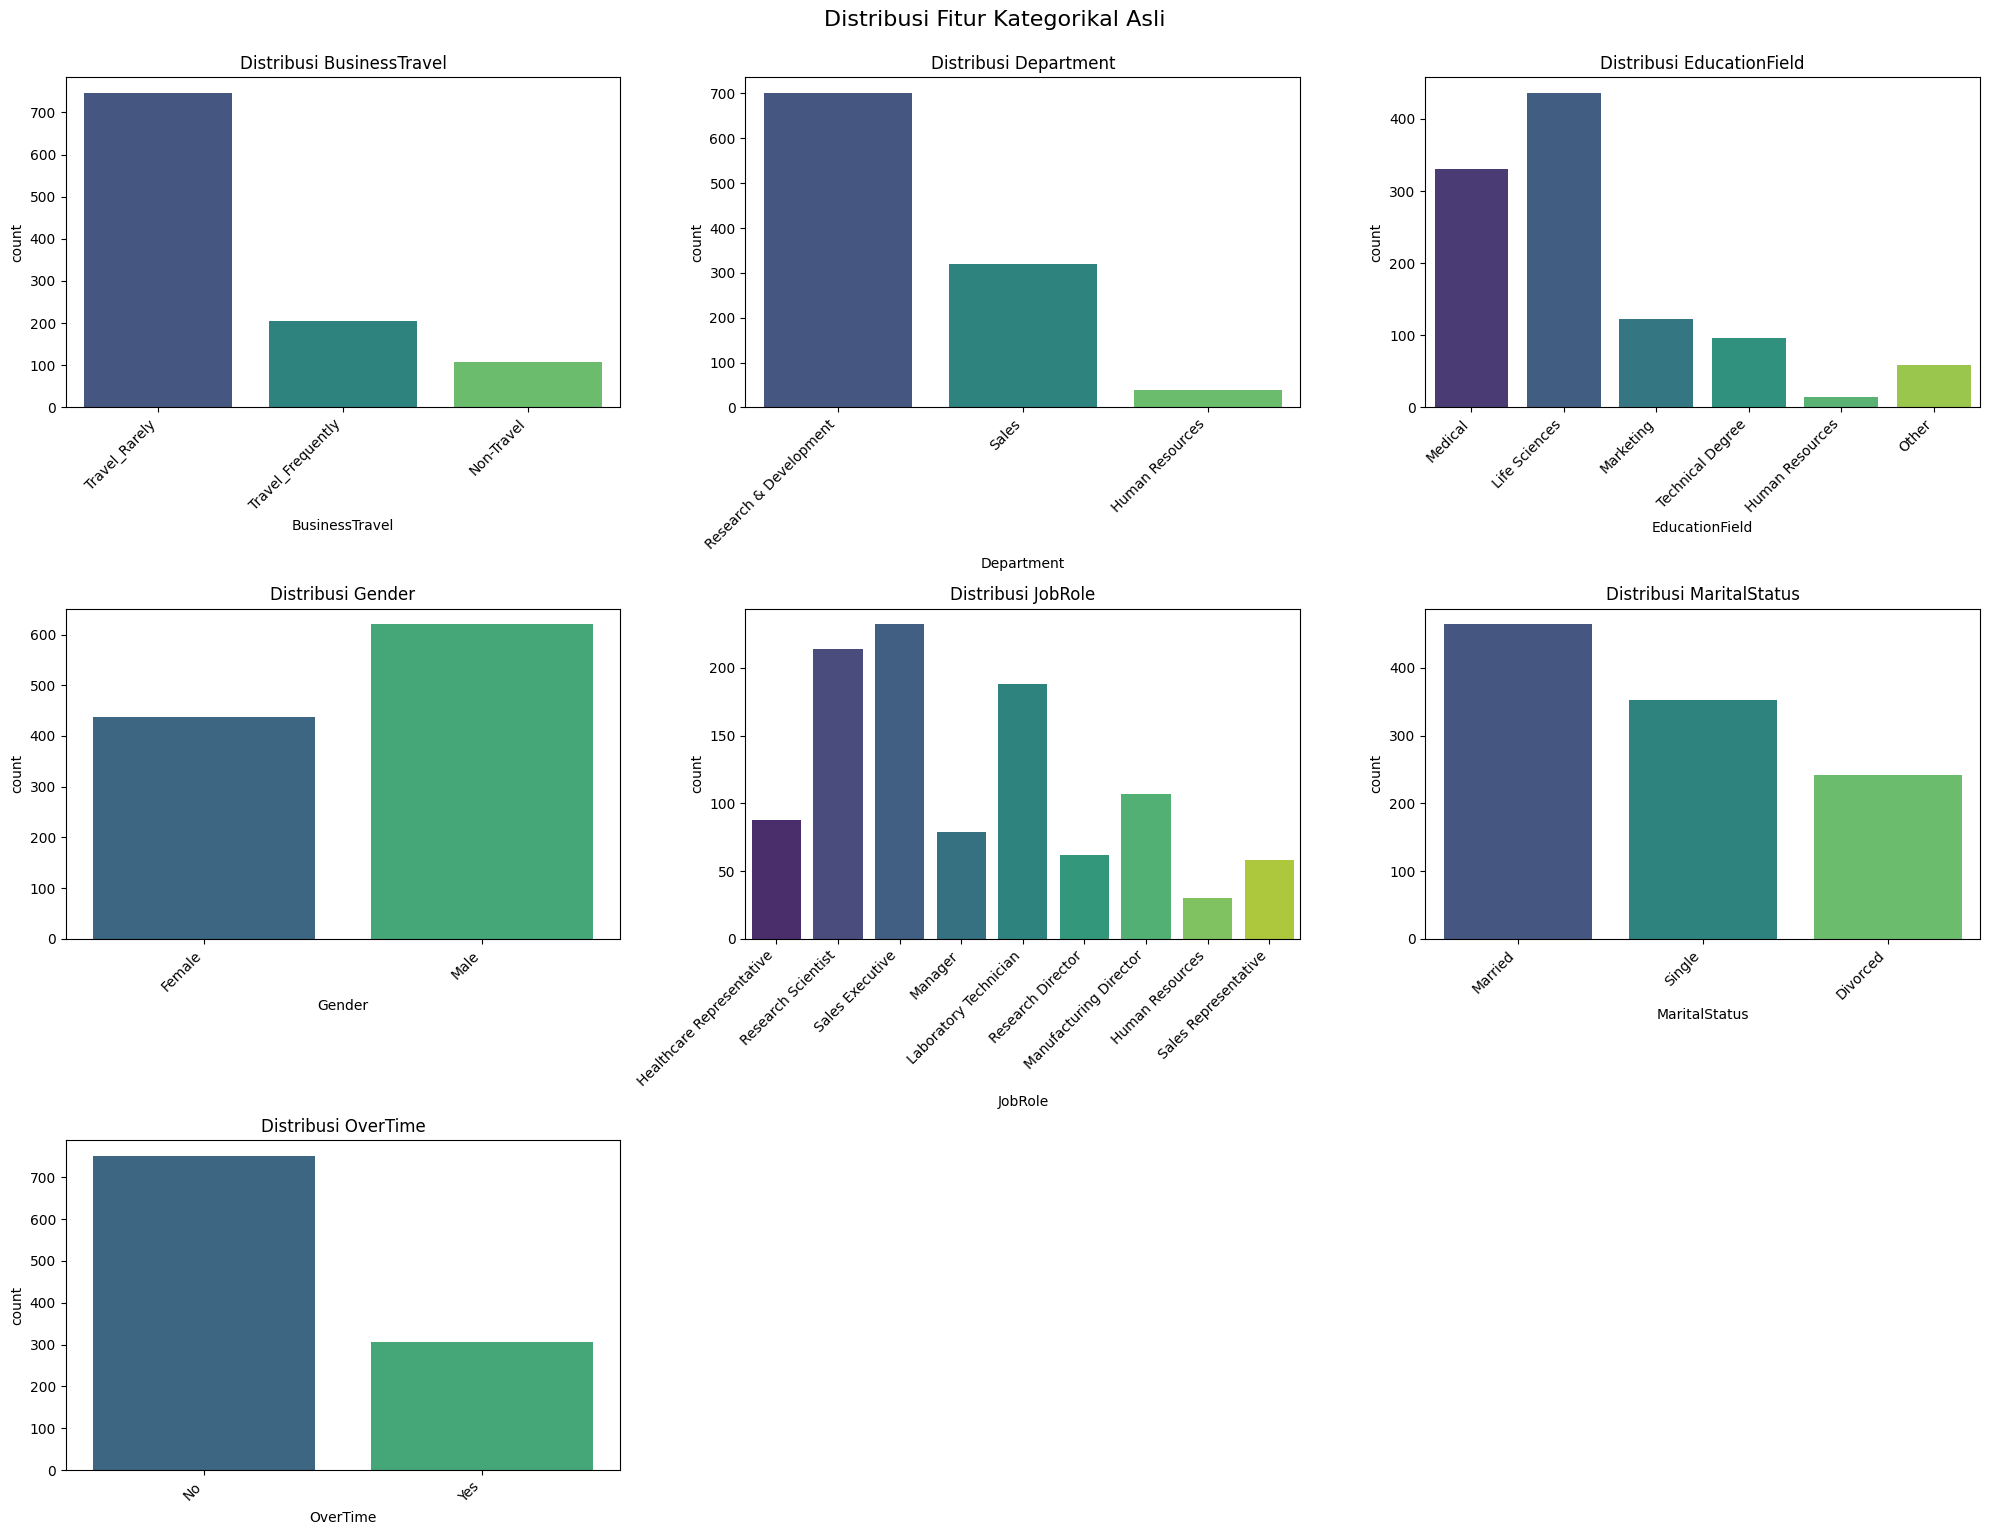

In [ ]:
# Visualisasi Distribusi Variabel Kategorikal
categorical_features = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(20, 15))
n_cols_cat = 3
n_rows_cat = (len(categorical_features) + n_cols_cat - 1) // n_cols_cat
for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.suptitle('Distribusi Fitur Kategorikal Asli', y=1.02, fontsize=16)
plt.savefig('distribusi_fitur_kategorikal.png')
plt.show()

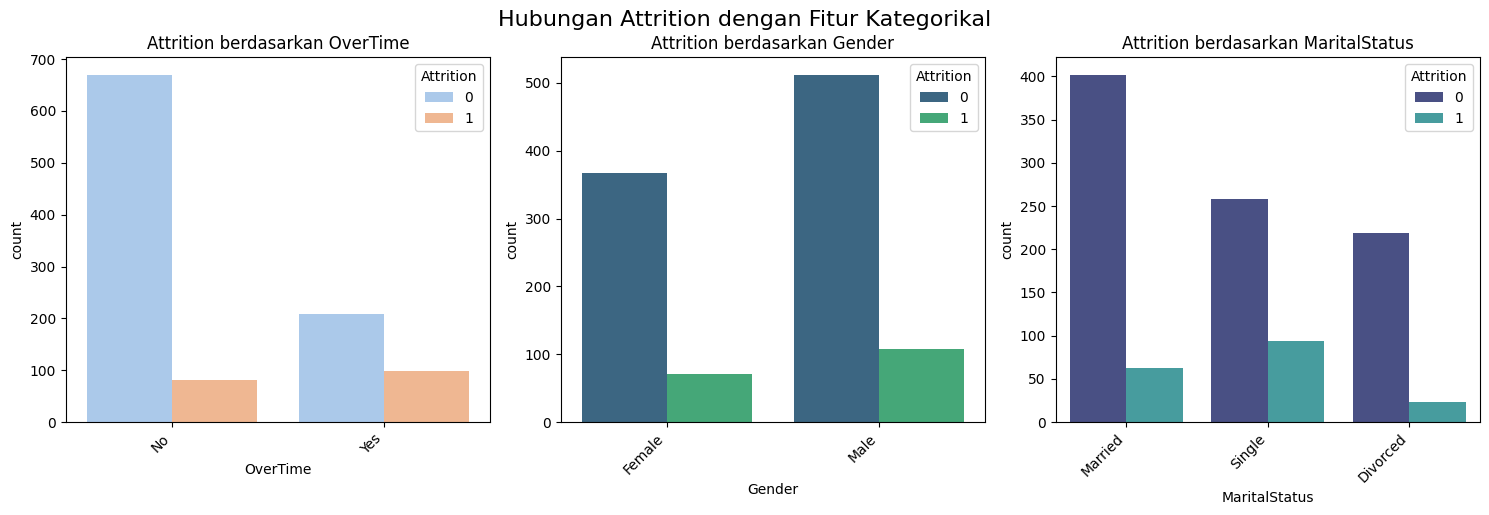

In [ ]:
# Visualisasi Attrition berdasarkan Fitur Kategorikal Pilihan
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel')
plt.title('Attrition berdasarkan OverTime')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Gender', hue='Attrition', palette='viridis')
plt.title('Attrition berdasarkan Gender')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='mako')
plt.title('Attrition berdasarkan MaritalStatus')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Hubungan Attrition dengan Fitur Kategorikal', y=1.02, fontsize=16)
plt.savefig('hubungan_attrition_kategorikal.png')
plt.show()
print("\n")

In [ ]:
# One-Hot Encoding untuk Kolom Kategorikal Nominal
# Gunakan drop_first=True untuk menghindari dummy variable trap (multikolinearitas)
print("Melakukan One-Hot Encoding untuk kolom-kolom:", nominal_cols)
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Shape dataframe setelah One-Hot Encoding:", df.shape)
print("\n")

Melakukan One-Hot Encoding untuk kolom-kolom: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Shape dataframe setelah One-Hot Encoding: (1058, 45)




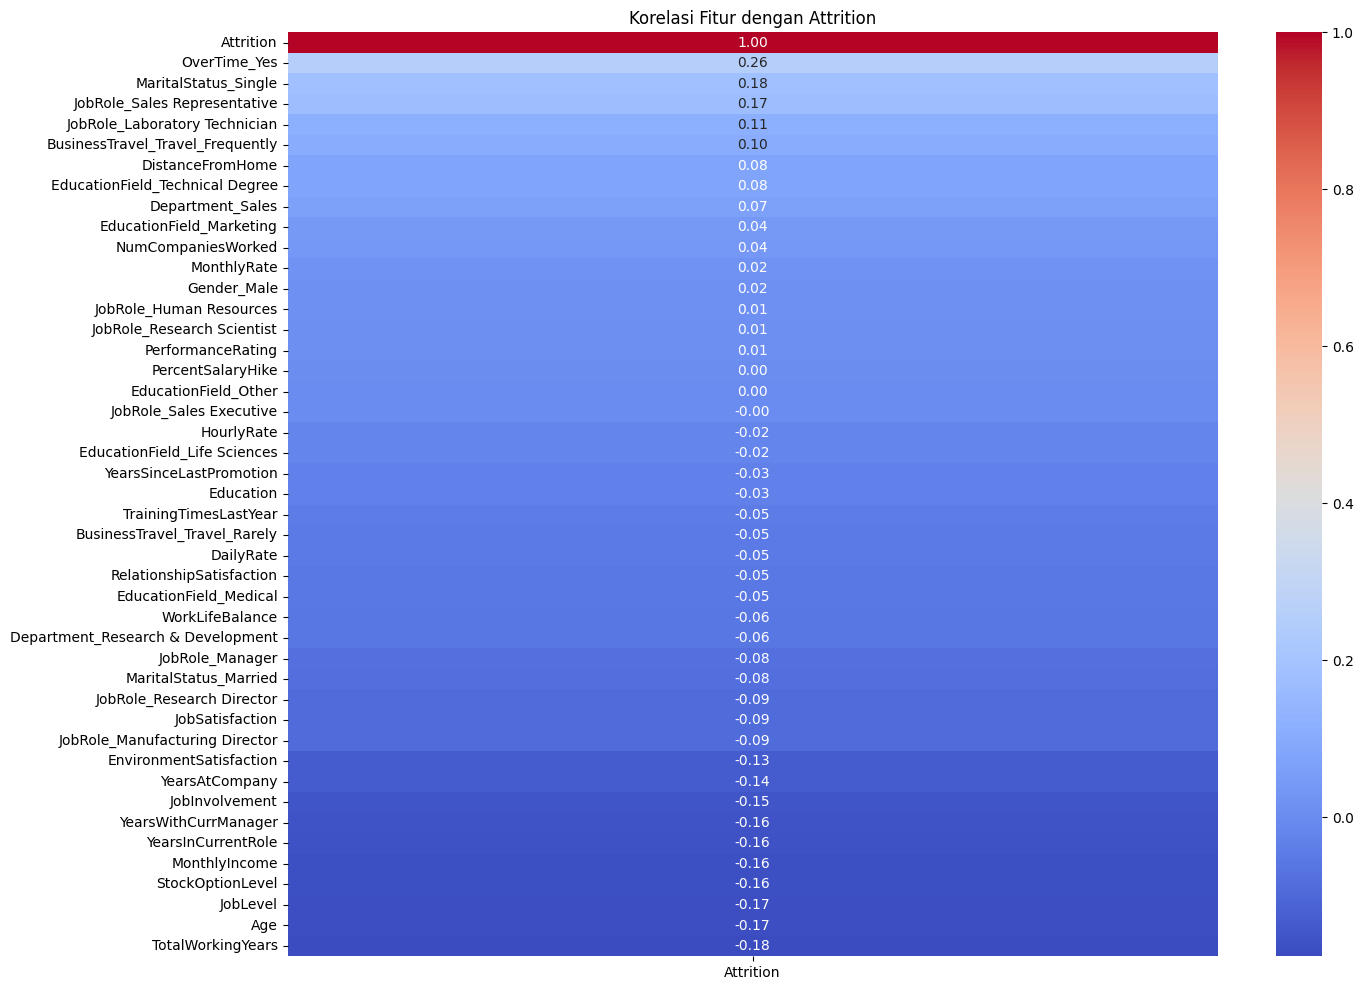

In [ ]:
# Visualisasi data setelah One-Hot Encoding
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur dengan Attrition')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
# Memisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
# Menyimpan daftar nama kolom fitur setelah One-Hot Encoding
joblib.dump(X.columns.tolist(), "trained_features_cols.pkl")
print("Daftar nama kolom fitur pelatihan disimpan sebagai 'trained_features_cols.pkl'.\n")

Daftar nama kolom fitur pelatihan disimpan sebagai 'trained_features_cols.pkl'.



In [ ]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Menyimpan objek scaler setelah di-fit
joblib.dump(scaler, "scaler.pkl")
print("Objek StandardScaler berhasil disimpan sebagai 'scaler.pkl'.\n")

Objek StandardScaler berhasil disimpan sebagai 'scaler.pkl'.



## **Modeling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Menyimpan model
joblib.dump(model, "model_random_forest.pkl")

['model_random_forest.pkl']

## **Evaluation**

In [ ]:
# Evaluasi Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       173
           1       1.00      0.15      0.27        39

    accuracy                           0.84       212
   macro avg       0.92      0.58      0.59       212
weighted avg       0.87      0.84      0.79       212

Confusion Matrix:
 [[173   0]
 [ 33   6]]


In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))

               Feature  Importance
9        MonthlyIncome    0.064088
0                  Age    0.059798
10         MonthlyRate    0.054878
43        OverTime_Yes    0.051232
1            DailyRate    0.050525
2     DistanceFromHome    0.049645
16   TotalWorkingYears    0.049048
5           HourlyRate    0.044762
19      YearsAtCompany    0.039128
11  NumCompaniesWorked    0.038236


<ipython-input-28-27e0bea8e881>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


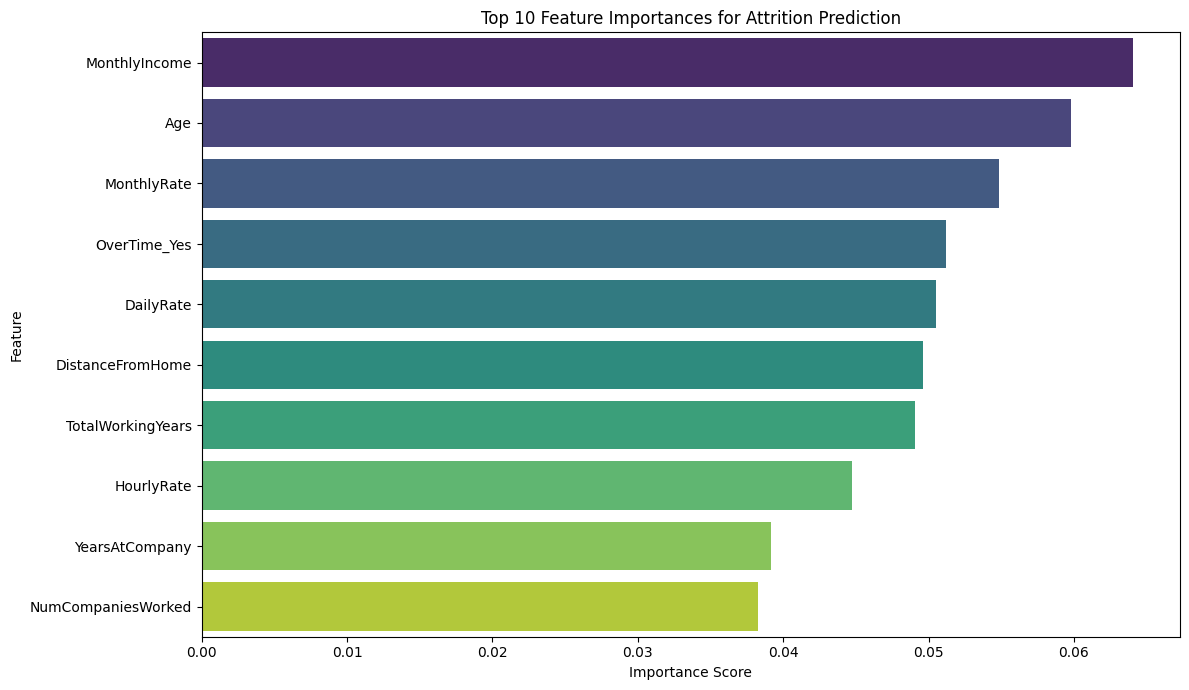

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Attrition Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("\n")

In [ ]:
# Menyimpan dataframe yang sudah diproses untuk dashboard
df.to_csv("hr_dashboard_ready.csv", index=False)